**Importing necessary libraries.**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

**Loading the dataset**

In [10]:
titanic_df=pd.read_csv('/content/Titanic_Dataset.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Basic Data overview**

In [12]:
titanic_df.shape

(891, 12)

In [13]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Handling missing value**

In [16]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.drop('Cabin', axis=1, inplace=True)

<ipython-input-16-28219fc6f163>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
<ipython-input-16-28219fc6f163>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [17]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Univariate Analysis**

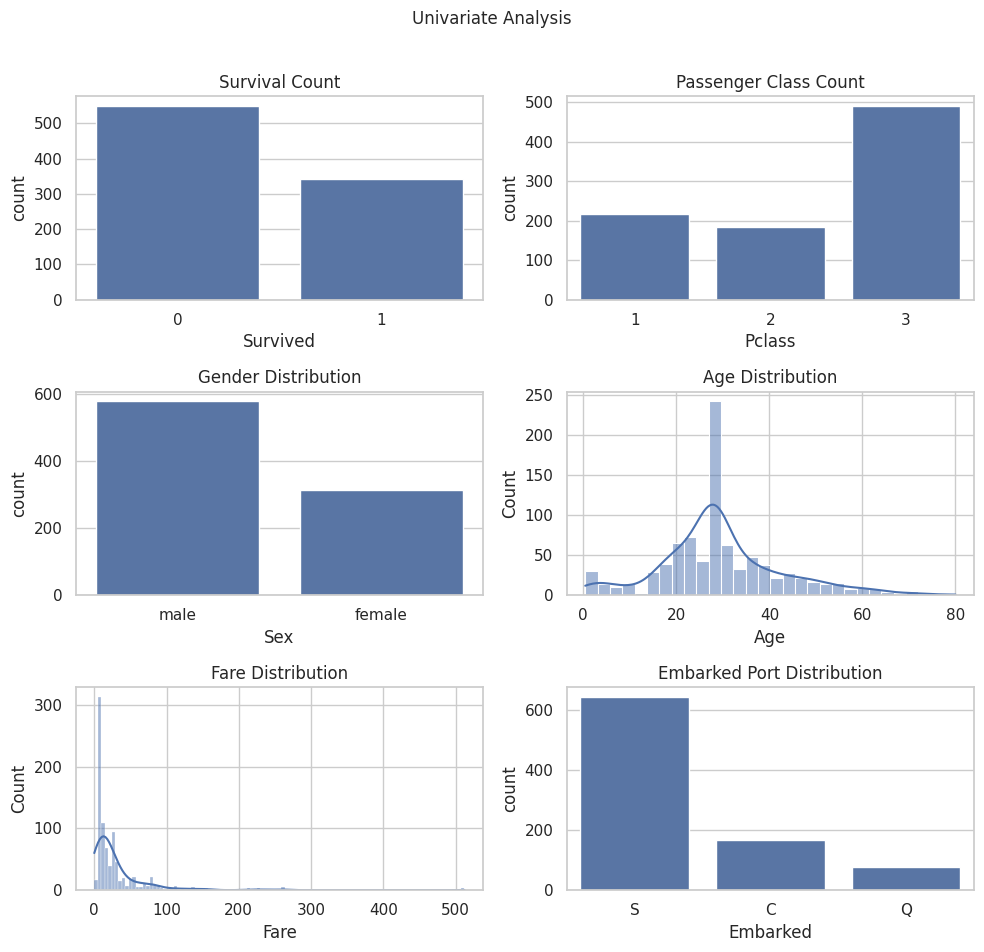

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle("Univariate Analysis", fontsize=12)

#Survived
sns.countplot(x='Survived', data=titanic_df, ax=axes[0, 0])
axes[0, 0].set_title('Survival Count')

#pclass
sns.countplot(x='Pclass', data=titanic_df, ax=axes[0, 1])
axes[0, 1].set_title('Passenger Class Count')

#sex
sns.countplot(x='Sex', data=titanic_df, ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')

#Age
sns.histplot(titanic_df['Age'].dropna(), kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution')

#Fare
sns.histplot(titanic_df['Fare'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Fare Distribution')

#Embarked
sns.countplot(x='Embarked', data=titanic_df, ax=axes[2, 1])
axes[2, 1].set_title('Embarked Port Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()



**Bivariate Analysis**

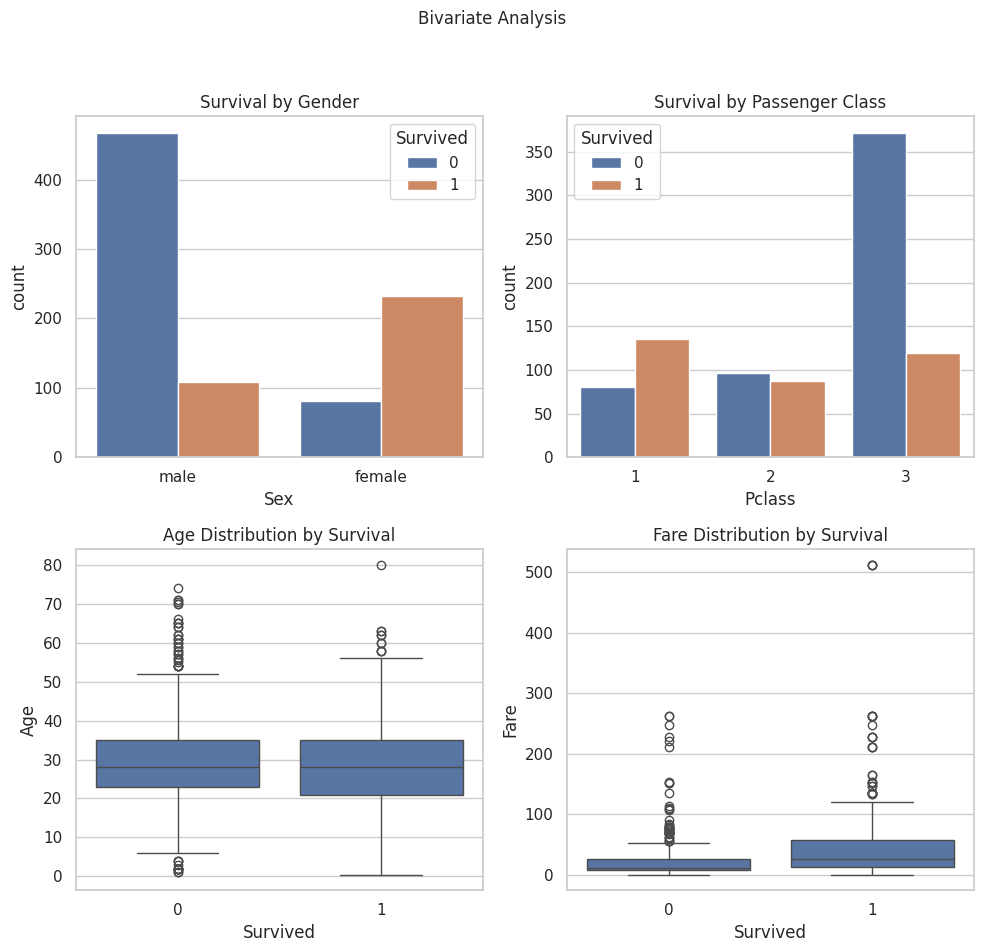

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Bivariate Analysis", fontsize=12)

# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=titanic_df, ax=axes[0, 0])
axes[0, 0].set_title('Survival by Gender')

# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=titanic_df, ax=axes[0, 1])
axes[0, 1].set_title('Survival by Passenger Class')

# Age vs Survival
sns.boxplot(x='Survived', y='Age', data=titanic_df, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution by Survival')

# Fare vs Survival
sns.boxplot(x='Survived', y='Fare', data=titanic_df, ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution by Survival')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Correlation Heatmap**

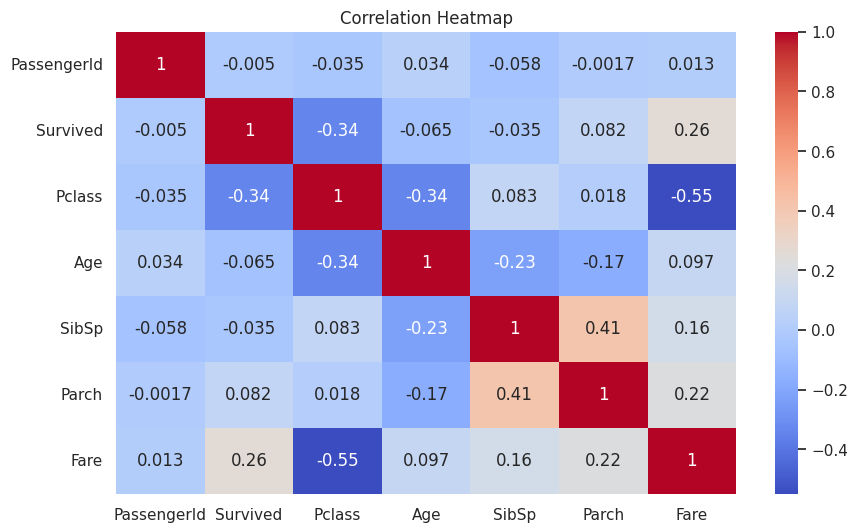

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Pair Plot**

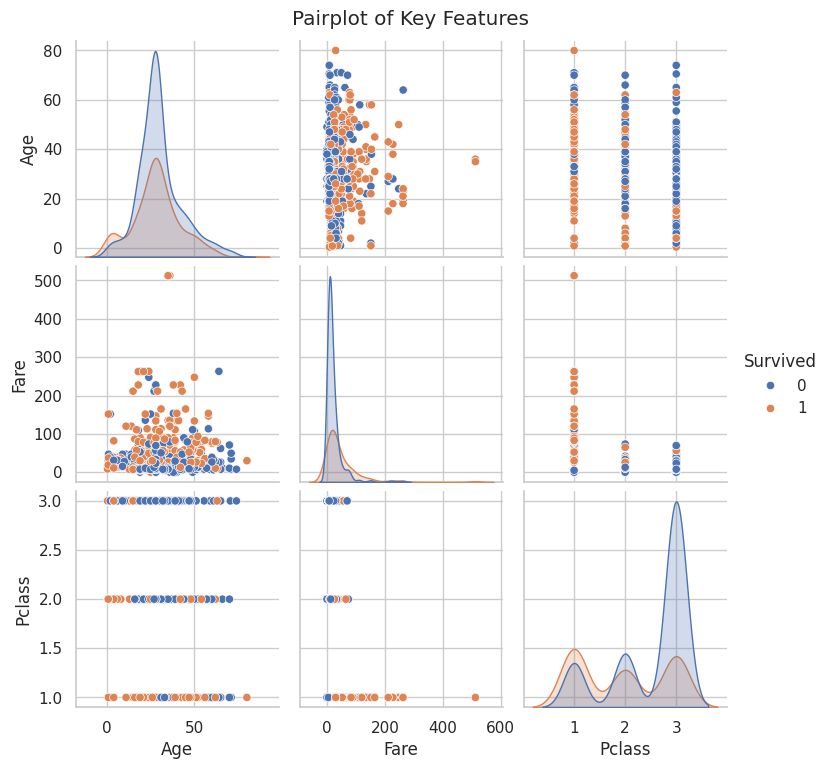

In [27]:
sns.pairplot(titanic_df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

**Summary of Insights**

In [28]:
print("Summary of Key Insights:")
print("- Females had a significantly higher survival rate than males.")
print("- Passengers in 1st class had the highest survival rate.")
print("- Majority of passengers were in 3rd class and male.")
print("- Fare has a right-skewed distribution with outliers.")
print("- Most passengers boarded from port 'S'.")
print("- Correlation shows strong relationship between Pclass and Fare.")

Summary of Key Insights:
- Females had a significantly higher survival rate than males.
- Passengers in 1st class had the highest survival rate.
- Majority of passengers were in 3rd class and male.
- Fare has a right-skewed distribution with outliers.
- Most passengers boarded from port 'S'.
- Correlation shows strong relationship between Pclass and Fare.
